## TumbuhKuy Function Calling
This notebook contains explanation about TumbuhKuy ways to use the scripts and many more.

### 1. Get Ingredient Nutrition

In [ ]:
from getRawIngredients import IngredientsData

# define the object
ingredient_data = IngredientsData()

# need an arugment about ingredient name
# ingredient name must same as ingredient name in dataset
# e.g. "Anak sapi, daging, gemuk, segar"
print(ingredient_data.get_info("Anak sapi, daging, gemuk, segar"))
# it will return the dictionary about ingredient nutrition

{'Air (gram)': 620, 'Energi (kal)': 184, 'Protein (gram)': 188, 'Lemak (gram)': 140, 'Karbohidrat (gram)': 0, 'Serat (gram)': 0, 'Harga (Rp.)': 28000}


### 2. Calling Status Classifier

In [6]:
from getStatus import StatusClassifier

# define the object
classifier = StatusClassifier()

# set user information, e.g. 4 year and 0 month age male
classifier.set_category(is_female=False, year_age=0) # month_age default value is 0

# get status classification, there are 2 mode of classification
# "Stunting" and "Gizi"
# Stunting classification only works for year_age <= 5
# Stunting use "massa_tubuh" to perform the stunting classification
# Gizi classification only works for year_age <= 19
# Gizi use "tinggi_badan to perform the gizi classification"

# Example stunting classification
print(classifier.get_classification(mode="stunting", tinggi_tubuh=45))

# Example gizi classification
print(classifier.get_classification(mode="gizi", massa_tubuh=10.4))

Stunting
Kurus


### 3. Calling Nutrition Threshold

In [ ]:
from getThreshold import NutritionThreshold

# define the object
nutri_threshold = NutritionThreshold()

# get threshold needs arguments of user gender, year_age, month age
# e.g. 2 year 5 month female
print(nutri_threshold.get_threshold(is_female=True, year_age=2, month_age=5))
# it will return the dictionary about user nutrition threshold

{'Gender': 'Perempuan', 'Kelompok Umur': '1 - 3 Tahun', 'Berat Badan (kg)': 13, 'Tinggi Badan (cm)': 92, 'Air (ml)': 1150, 'Energi (kal)': 1350, 'Protein (gram)': 20, 'Lemak (gram)': 45, 'Karbohidrat (gram)': 215, 'Serat (gram)': 19}


### 4. Get Optimized Ingredients

['Ikan paling, segar', 'Ikan tembang, segar', 'Telur bebek, bagian kuning, segar']


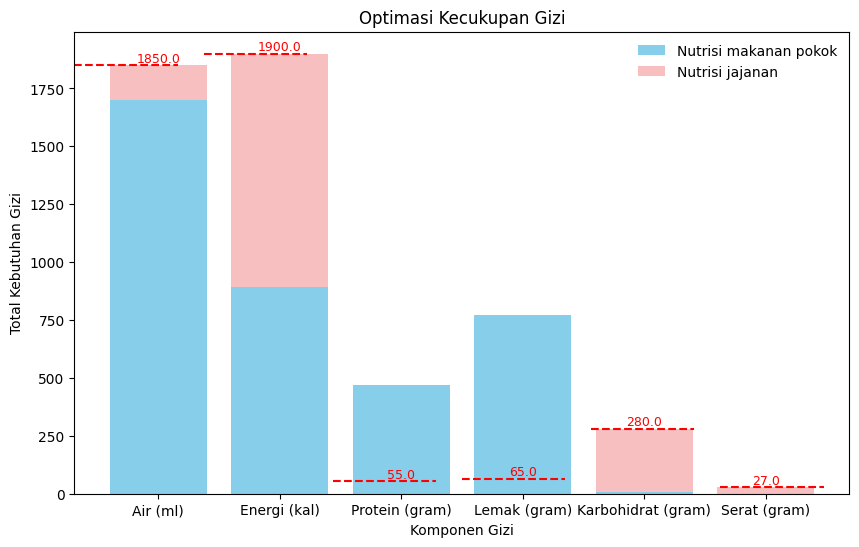

In [9]:
from getIngredients import IngredientsGenerator

# define the object
ingredient_gen = IngredientsGenerator()

# set user information
# e.g. 12 year 4 month female with gizi status and massa tubuh
# remember to input the classification mode and the parameters to correctly use the function
ingredient_gen.set_info(is_female=True, year_age=12, month_age=4, mode="gizi", massa_tubuh=39.5)


# generate the optimized ingredients
# input argument with user cost preferences
# e.g. Rp 40.000
ingredient_gen.nutrition_optim(max_price=40000)
# call the optimized ingredients by calling the attribute
print(ingredient_gen.optimized_ingredients)

# visualize the bar chart about the nutrition achieved
ingredient_gen.visualize_result()

### 5. Generate the Recipes

In [ ]:
from getRecipes import RecipesGenerator

# define the object
recipes_gen = RecipesGenerator()

# input arguments list of optimized ingredients with year_age and month age
# print(ingredient_gen.optimized_ingredients)
recipes = recipes_gen.get_recipes(ingredients=ingredient_gen.optimized_ingredients, year_age=12, month_age=4)
print(recipes)
# this will return list[dict] with length of 5 (5 recipes)
# e.g. recipes[0] -> return the first recipe

Jumlah resep: 2635
Contoh resep pertama
[{"nama_resep": "Nugget Ikan Pedas", "kategori": "Makanan", "bahan_baku": ["Ikan paling, segar", "Telur bebek, bagian kuning, segar", "Bawang putih", "Merica bubuk", "Garam", "Tepung panir"], "alat": ["Pisau", "Talenan", "Blender", "Wajan", "Penggorengan", "Sendok"], "langkah_pembuatan": ["Cuci bersih ikan paling dan potong kecil-kecil", "Haluskan ikan paling dengan blender", "Campur ikan yang sudah dihaluskan dengan kuning telur, bawang putih cincang, merica bubuk, dan garam", "Bentuk adonan menjadi nugget", "Baluri nugget dengan tepung panir", "Goreng nugget hingga matang dan kecoklatan"]}, {"nama_resep": "Sup Ikan Tembang Tomat", "kategori": "Makanan", "bahan_baku": ["Ikan tembang, segar", "Tomat", "Bawang merah", "Bawang putih", "Garam", "Gula"], "alat": ["Pisau", "Talenan", "Panci", "Sendok", "Penggorengan"], "langkah_pembuatan": ["Cuci bersih ikan tembang dan potong sesuai selera", "Tumis bawang merah dan bawang putih cincang hingga harum",